In [15]:
from skimage import io 
import pydicom as dicom
import numpy as np 
import time
from skimage.util import img_as_float
from skimage.util import img_as_ubyte
import matplotlib.pyplot as plt 
from skimage import color
from skimage.morphology import erosion, dilation, opening, closing,disk
from skimage import measure
from skimage.color import label2rgb
import matplotlib.pyplot as plt 


img = io.imread( "Letters.png")


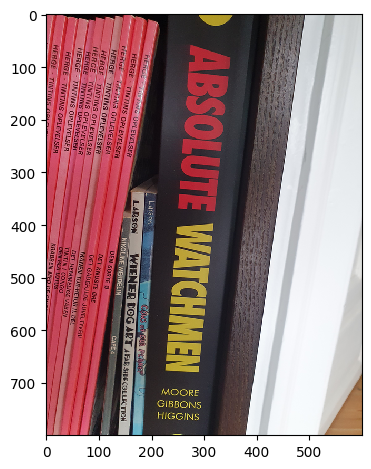

In [2]:
io.imshow(img)

#### Compute a binary image where the pixels that has an RGB value with R>100 and G<100 and B<100 are set to 1 and the rest of the pixels to 0



In [12]:
val = 100 

bin_img = (img[:,:,0] > val) & (img[:,:,1] < val) & (img[:,:,2] < val)

# Convert boolean values to 0 and 1
bin_img = bin_img.astype(np.uint8)


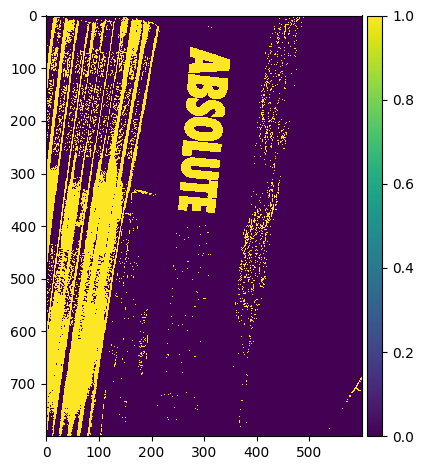

In [13]:
io.imshow(bin_img)

#### Erode the binary binary image using a disk-shaped structuring element with radius=3


In [14]:
mask= erosion(bin_img,disk(3))

#### Compute all the BLOBs in the image


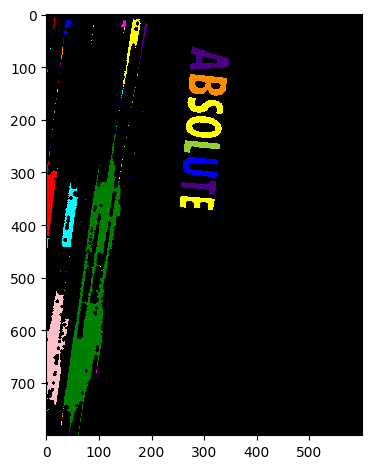

In [16]:
label_img = measure.label(mask)
im_blob= label2rgb(label_img)

io.imshow(im_blob)

#### Computes the area and perimeter of all found BLOBs
 

In [17]:
region_props = measure.regionprops(label_img) 


#### Remove all BLOBs with an area<1000 or an area>4000 or a perimeter<300 
 

c:\Users\User\Documents\imganalysis\DTUImageAnalysis\imganals\lib\site-packages\skimage\io\_plugins\matplotlib_plugin.py:149: UserWarning: Low image data range; displaying image with stretched contrast.
  lo, hi, cmap = _get_display_range(image)


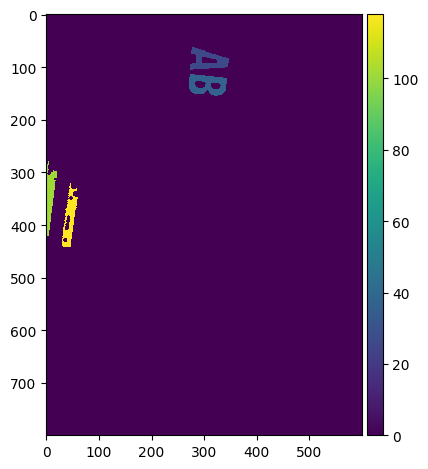

In [21]:
min_area = 1000 
max_area = 4000 
min_prem = 300 
label_img_filter = label_img

for region in region_props: 
    if region.area>max_area or region.area<min_area or region.perimeter<min_prem:
        for cords in region.coords:
            label_img_filter[cords[0],cords[1]] = 0 

io.imshow(label_img)

## What letters are left in the photo after these operations?


AB

## To try to find the red letters, we first extract the R, G, B color channels from the image. 
#### Secondly we create a new binary image from the RGB image by setting all pixel with R > 100 and G < 100 and B < 100 to 1 and the remaining pixels to 0.The binary image is eroded busing a disk shaped structuring element with radius=3. How many foreground pixels are there in the eroded image?




In [26]:
b = (img[:,:,0] > val) & (img[:,:,1] < val) & (img[:,:,2] < val)

# Convert boolean values to 0 and 1
b = erosion(b,disk(3))

In [27]:
np.sum(b==1)

36073

#### You would like to pre-process the image before the analysis and you try with the following approach:

 
##### Convert the input photo from RGB to gray scale
##### Apply a median filter to the gray scale image with a square footprint of size  8
 

#### What is the value at the pixel at (100, 100) in the resulting image?



In [35]:
from skimage.filters import median

grey = color.rgb2gray(img)
size = 8
footprint = np.ones([size,size])

med_img = median(grey,footprint)



In [36]:
print(med_img[100,100])

0.44944431372549015
